# Testosterone (Serum) ELISA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate, optimize

In [2]:
data = pd.read_csv('data/testosterone_ELISA.txt', delimiter='\s+',
                   index_col=0, comment='#')

standards = data.iloc[:-1] # df
test = data.iloc[-1] # series

In [3]:
def result(f, val):
  return optimize.newton(lambda x: f(x) - val, x0=0.5)

In [4]:
# interpolation
xs = np.linspace(min(standards.index), max(standards.index), 50)
interp = interpolate.PchipInterpolator(standards.index, standards.mean(axis=1).values,
                                       extrapolate=True)
ys = interp(xs)

In [5]:
# test result
test_value = test.mean()
test_result = result(interp, test_value)

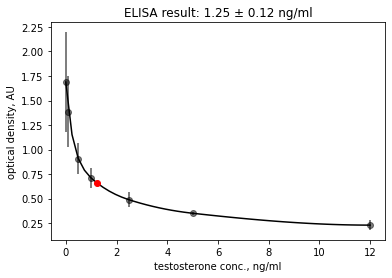

In [6]:
plt.plot(xs, ys, color='k') # standards

plt.errorbar(x=standards.index, y=standards.mean(axis=1),
             yerr=2*standards.std(axis=1), fmt='o',
             color='k', elinewidth=2,
             capsize=0, alpha=0.5)

plt.plot(test_result, test_value, 'ro') # analyte

plt.xlabel('testosterone conc., ng/ml')
plt.ylabel('optical density, AU')
plt.title(f'ELISA result: {test_result:.2f} ± {2 * test.std():.2f} ng/ml');